In [1]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import warnings
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE



In [3]:
description= pd.read_csv('archive/description.csv')
diets= pd.read_csv('archive/diets.csv')
medications= pd.read_csv('archive/medications.csv')
precautions= pd.read_csv('archive/precautions_df.csv', index_col= 0)
Symptom_severity_df= pd.read_csv('archive/Symptom-severity.csv')
sym_des= pd.read_csv('archive/symtoms_df.csv', index_col= 0)
df= pd.read_csv('archive/Training.csv')
workout=pd.read_csv('archive/workout_df.csv').iloc[:, 2:]


In [4]:
# Before Removing Nulls and Duplicate Data
# Create a dictionary with DataFrame names as keys and DataFrames as values 

import time
# Log start time
start_time = time.time()

dataframes = {
    'medications': medications,
    'df': df,
    'Symptom_severity_df': Symptom_severity_df,
    'sym_des': sym_des,
    'description': description,
    'workout': workout,
    'diets': diets,
    'precautions': precautions
}

# Loop through each DataFrame and to read dataframe.info
for name, dataf in dataframes.items():
    print(f"DataFrame '{name}':")
    print(dataf.info())
    print('######################################################')  # Just for a line between outputs


# Log end time
end_time = time.time()
# Calculate the time taken
time_taken_before = end_time - start_time
print(print(f'time taken before data cleaning, {time_taken_before:.3f} in milliseconds'))


DataFrame 'medications':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     41 non-null     object
 1   Medication  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes
None
######################################################
DataFrame 'df':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB
None
######################################################
DataFrame 'Symptom_severity_df':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
#######################

In [5]:
# Eliminating all NaN from the dataset
# Remove inplace true and doing equals to dataframe to keeping datatype as dataframe
sym_des=sym_des.dropna()
precautions=precautions.dropna()

print("precautions Dataframe\n", precautions.isna().sum())
print("\nSymptons Dataframe\n", sym_des.isna().sum())


precautions Dataframe
 Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    0
Precaution_4    0
dtype: int64

Symptons Dataframe
 Disease      0
Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
dtype: int64


In [6]:
#Removing all Duplicate data from all the Dataframes
medications=medications.drop_duplicates()
df=df.drop_duplicates()
Symptom_severity_df=Symptom_severity_df.drop_duplicates()
sym_des=sym_des.drop_duplicates()
description=description.drop_duplicates()
workout=workout.drop_duplicates()
diets=diets.drop_duplicates()
precautions=precautions.drop_duplicates()

In [7]:
# #AFTER Removing Nulls and Duplicate Data from all the Dataframes
# Create a dictionary with DataFrame names as keys and DataFrames as values
import time
# Log start time
start_time = time.time()
dataframes = {
    'medications': medications,
    'df': df,
    'Symptom_severity_df': Symptom_severity_df,
    'sym_des': sym_des,
    'description': description,
    'workout': workout,
    'diets': diets,
    'precautions': precautions
}

# Loop through each DataFrame and to read dataframe.info

for name, dataf in dataframes.items():
    print(f"DataFrame '{name}':")
    # print(dataf.isnull().sum())
    # print(dataf.shape)
    print(dataf.info())
    print('######################################################')  # Just for a blank line between outputs


# Log end time
end_time = time.time()
# Calculate the time taken
time_taken_after = end_time - start_time
print(f'time taken after data cleaning {time_taken_after:.3f} in milliseconds vs before datacleaning {time_taken_before:.3f} in milliseconds')


DataFrame 'medications':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     41 non-null     object
 1   Medication  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes
None
######################################################
DataFrame 'df':
<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 407
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 318.2+ KB
None
######################################################
DataFrame 'Symptom_severity_df':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
############################

In [8]:
#sample data
medications.head()

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."


In [9]:
#sample data

Symptom_severity_df.head(5)

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [10]:
#sample data
sym_des.head(5)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
10,Allergy,continuous_sneezing,shivering,chills,watering_from_eyes
20,GERD,stomach_pain,acidity,ulcers_on_tongue,vomiting
21,GERD,stomach_pain,ulcers_on_tongue,vomiting,cough
22,GERD,stomach_pain,acidity,vomiting,cough


In [11]:
#sample Data
description.head(5)

,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...
4,Drug Reaction,Drug Reaction occurs when the body reacts adve...


In [12]:
#Sample Data
workout.head(5)

,disease,workout
0,Fungal infection,Avoid sugary foods
1,Fungal infection,Consume probiotics
2,Fungal infection,Increase intake of garlic
3,Fungal infection,Include yogurt in diet
4,Fungal infection,Limit processed foods


In [13]:
#Sample Data
diets.head(5)

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."


In [14]:
#Sample Data
precautions.head(5)

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,GERD,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise


In [15]:
#Sample Data
df.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection


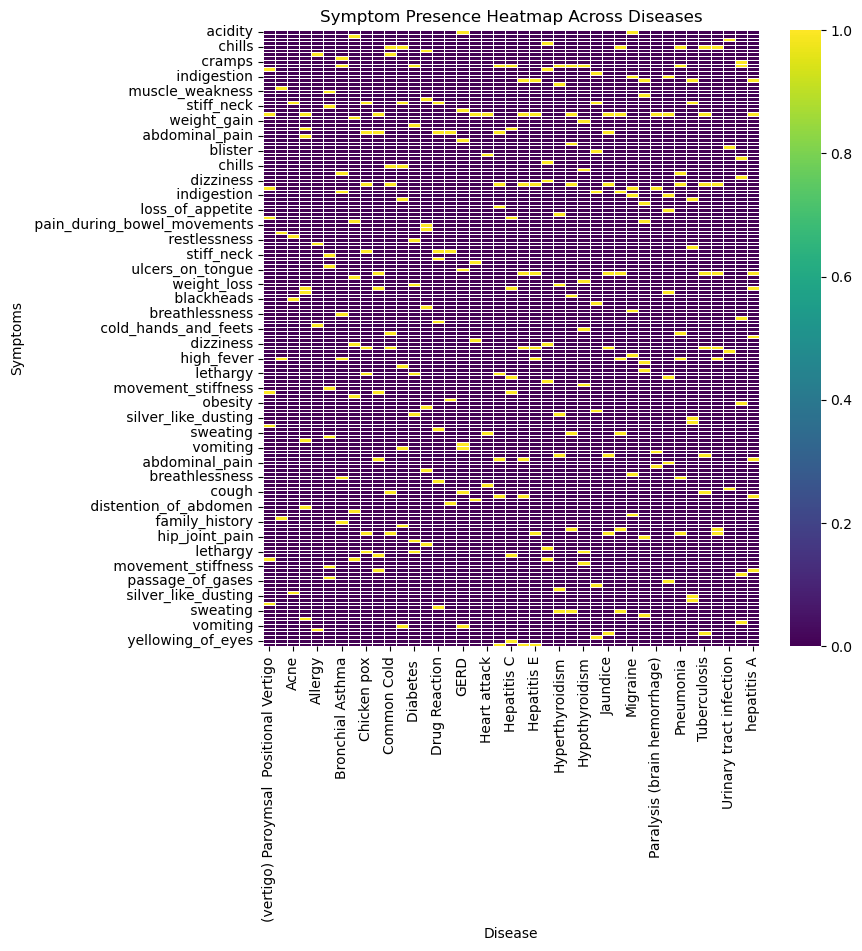

In [16]:
#Heatmap Diesease and their Symptoms contained in sym_des Dataframe
# Creating a boolean DataFrame for symptoms presence
symptoms_encoded = pd.get_dummies(sym_des.drop(columns=['Disease']), prefix='', prefix_sep='')

# # # Grouping by Disease to combine similar records
symptoms_encoded = symptoms_encoded.groupby(sym_des['Disease']).max()
# # Generating the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(symptoms_encoded.T, cmap='viridis', cbar=True, linewidths=.5)
plt.title('Symptom Presence Heatmap Across Diseases')
plt.xlabel('Disease')
plt.ylabel('Symptoms')
plt.show()

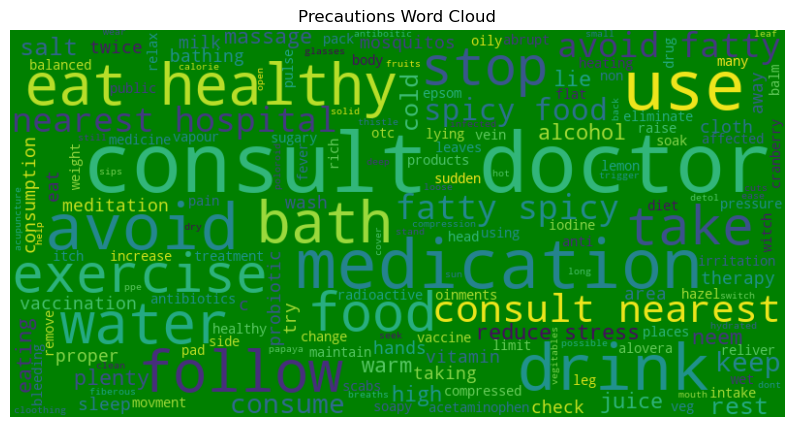

In [21]:
# Wordcount of precuataions usage in various disease, built using precautions dataframe
from wordcloud import WordCloud

# Ensure all data is converted to string before joining
precautions_visual = precautions.drop(columns=['Disease']).fillna('')

# # Convert all values to string and combine into a single text
precautions_text = " ".join(precautions_visual.applymap(str).values.flatten())

# # Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='green').generate(precautions_text)

# # Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Precautions Word Cloud')
plt.show()


In [23]:
# groups the data by each precaution and counts how many times each one appears across all diseases.

import plotly.express as px

# Reshape the DataFrame to have one column per precaution type
precautions_melted = precautions.melt(id_vars=['Disease'], var_name='Precaution_Type', value_name='Precaution')

# Count the occurrence of each precaution for each disease
precautions_count = precautions_melted.groupby(['Precaution']).size().reset_index(name='Count')


# Create the bar plot using Plotly
fig = px.bar(precautions_count, x='Precaution', y='Count', 
             title='Total Count of Each Precaution Across All Conditions',
             labels={'Count': 'Number of Precautions'},
             height=600)


# Update layout for better visibility
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

# Show the interactive plot
fig.show()


In [24]:
X = df.drop('prognosis' ,axis=1)
y = df['prognosis']


In [25]:
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)


In [26]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((243, 132), (61, 132), (243,), (61,))

In [28]:
# Here we can train the top best models which can give best accuracy So i can create a Dictionary of models to check which model is more accurate.
models = {
      'SVC' : SVC(kernel='linear'),
      'Random Forest' :RandomForestClassifier(random_state=42,n_estimators=100),
      'KNeighbors' : KNeighborsClassifier(n_neighbors=5),
      'Gradient Boosting': GradientBoostingClassifier(random_state=42,n_estimators=100),
      'MultinomialNB' :MultinomialNB() 
}
for model_name , model in models.items():
    # Train model
    model.fit(X_train,y_train)
    # test model
    predictions = model.predict(X_test)
    # calculate accuracy
    accuracy = accuracy_score(y_test,predictions)
    # calculate confusion matrix
    cm = confusion_matrix(y_test,predictions)
    # print results
    print(f"{model_name} accuracy : {accuracy}")
    print(f"{model_name} confusion matrix :")
    print(np.array2string(cm,separator=', '))

SVC accuracy : 1.0
SVC confusion matrix :
[[2, 0, 0, ..., 0, 0, 0],
 [0, 1, 0, ..., 0, 0, 0],
 [0, 0, 3, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 1, 0, 0],
 [0, 0, 0, ..., 0, 3, 0],
 [0, 0, 0, ..., 0, 0, 2]]
Random Forest accuracy : 1.0
Random Forest confusion matrix :
[[2, 0, 0, ..., 0, 0, 0],
 [0, 1, 0, ..., 0, 0, 0],
 [0, 0, 3, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 1, 0, 0],
 [0, 0, 0, ..., 0, 3, 0],
 [0, 0, 0, ..., 0, 0, 2]]
KNeighbors accuracy : 0.9508196721311475
KNeighbors confusion matrix :
[[2, 0, 0, ..., 0, 0, 0],
 [0, 1, 0, ..., 0, 0, 0],
 [0, 1, 0, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 1, 0, 0],
 [0, 0, 0, ..., 0, 3, 0],
 [0, 0, 0, ..., 0, 0, 2]]
Gradient Boosting accuracy : 0.8360655737704918
Gradient Boosting confusion matrix :
[[2, 0, 0, ..., 0, 0, 0],
 [0, 0, 0, ..., 0, 0, 0],
 [0, 0, 3, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 0, 0, 0],
 [0, 0, 0, ..., 0, 3, 0],
 [0, 0, 0, ..., 0, 0, 2]]
MultinomialNB accuracy : 0.9672131147540983
MultinomialNB confusion matrix :
[[2, 0, 0, ...,

In [29]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_pred,y_test)
acc

1.0

In [30]:
# Path to save the model
path = 'archive/working_1//svc.pkl'
# Ensure the directory exists
os.makedirs(os.path.dirname(path), exist_ok=True)

# Save the model
with open(path, 'wb') as file:
    pickle.dump(svc, file)

In [31]:
# load the data-set
svc = pickle.load(open(path,'rb'))

In [32]:
# 2d array convert
X_test.iloc[0].values.reshape(1,-1)


array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [33]:
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)

# Fit RFE
rfe.fit(X_train, y_train)

# Get feature rankings
feature_importances = rfe.ranking_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Rank': feature_importances
})

# Sort the DataFrame by importance (lower ranking means more important)
features_df = features_df.sort_values(by='Rank')

print("Most Influential Variables:")

features_df.head()

Most Influential Variables:


,Feature,Rank
14,fatigue,1
11,vomiting,2
25,high_fever,3
35,loss_of_appetite,4
31,headache,5


In [34]:
# now take a pred on this 2d array to check that our model pred correctly or not

# test 1 :
print('Model Predictions :',svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print('Actual Labels :', y_test[0])

Model Predictions : [22]
Actual Labels : 22


In [35]:
# test 2 :
print('Model Predictions :',svc.predict(X_test.iloc[40].values.reshape(1,-1)))
print('Actual Labels :', y_test[40])

Model Predictions : [28]
Actual Labels : 28


In [36]:
confusion = confusion_matrix(y_test, predictions)
print(confusion)

[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]


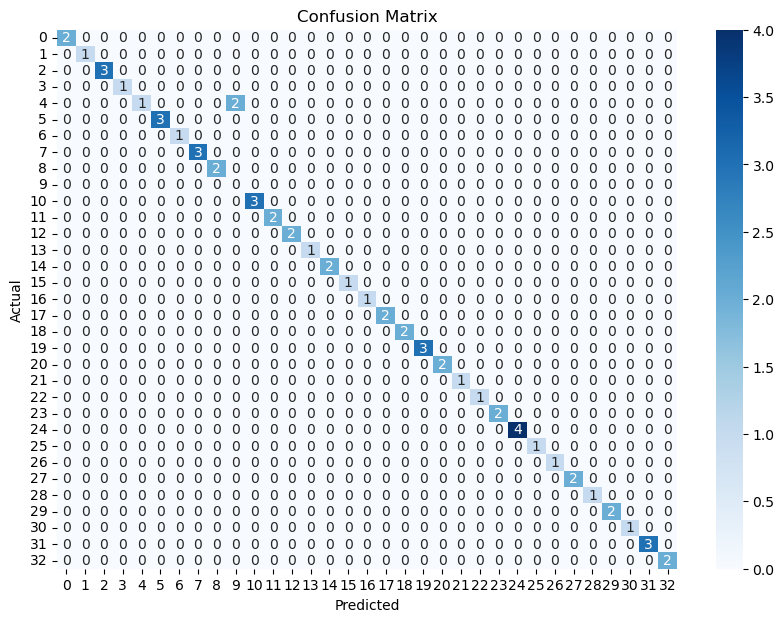

In [37]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
classification = classification_report(y_test, predictions)
print(classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      0.33      0.50         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       0.00      0.00      0.00         0
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       1.00    

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 1.0


In [40]:
print(y_test)

[22 19  8 24  6  4 11 20 21 33  4 29 12 22 11 12 11 36 26 40 39  0 24 14
 19 13 25 30 39  8 40  2 34  1  9  0 30 32  9  6 28 30 34  8  4 38  2 30
 35 39 25 25  6  7  2 26 13 29 27 36  3]


In [41]:
def helper(dis): # this funtion can give us the symptoms Description,Precautions,Medication,Diet plan,workout 
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

# here i create a dictonary 1- symptoms and list 1- diseases because we transform our data in lobelEncoder (0,1) but the patient or user can not understand that which number represented the disease or symptom 

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def given_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [42]:
symptoms = input("Enter your symptoms.......")
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
# Remove any extra characters, if any
predicted_disease = given_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1

=================predicted disease============
Fungal infection
=================description==================
Fungal infection is a common skin condition caused by fungi.
=================precautions==================
1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths
=================medications==================
5 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
=================workout==================
6 :  Avoid sugary foods
7 :  Consume probiotics
8 :  Increase intake of garlic
9 :  Include yogurt in diet
10 :  Limit processed foods
11 :  Stay hydrated
12 :  Consume green tea
13 :  Eat foods rich in zinc
14 :  Include turmeric in diet
15 :  Eat fruits and vegetables
=================diets==================
16 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


In [43]:
## Finding difference in importances across random states
## Need to create this for later
all_importances_df = pd.DataFrame()
for i in range(1, 10):
    rf_model = RandomForestClassifier(n_estimators=500, random_state=i)
    rf_model = rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_feature_importances = rf_model.feature_importances_

    iteration_df = pd.DataFrame({
        'Feature': X_train.columns,
        f'Importance_{i}': rf_feature_importances
    })
    
    ##Set up if condition for first iteration
    if all_importances_df.empty:
        all_importances_df = iteration_df

    else:
        all_importances_df = pd.merge(all_importances_df, iteration_df, on='Feature', how='outer')
print("Most Influential Variables:")
print(all_importances_df)

Most Influential Variables:
                  Feature  Importance_1  Importance_2  Importance_3  \
0                 itching      0.021351      0.019711      0.019809   
1               skin_rash      0.009038      0.008677      0.009243   
2    nodal_skin_eruptions      0.006314      0.007892      0.006793   
3     continuous_sneezing      0.001990      0.002895      0.003059   
4               shivering      0.003232      0.002895      0.002651   
..                    ...           ...           ...           ...   
127  small_dents_in_nails      0.005248      0.004744      0.005014   
128    inflammatory_nails      0.004849      0.005637      0.004231   
129               blister      0.009418      0.009088      0.009539   
130  red_sore_around_nose      0.003572      0.004167      0.003763   
131     yellow_crust_ooze      0.004375      0.003825      0.004470   

     Importance_4  Importance_5  Importance_6  Importance_7  Importance_8  \
0        0.020620      0.019619      0.019

In [44]:
## Analysis: How much does the importance of each feature vary across the different random states?
analysis_all_importances_df = pd.DataFrame()
analysis_all_importances_df['Mean'] = all_importances_df.iloc[:, 1:].mean(axis=1)
analysis_all_importances_df['Median'] = all_importances_df.iloc[:, 1:].median(axis=1)
analysis_all_importances_df['Min'] = all_importances_df.iloc[:, 1:].min(axis=1)
analysis_all_importances_df['Max'] = all_importances_df.iloc[:, 1:].max(axis=1)
analysis_all_importances_df['Std'] = all_importances_df.iloc[:, 1:].std(axis=1)


In [45]:
analysis_all_importances_df['Std'].describe()

count    132.000000
mean       0.000487
std        0.000186
min        0.000000
25%        0.000362
50%        0.000467
75%        0.000619
max        0.000992
Name: Std, dtype: float64

In [46]:
features_rf_df = all_importances_df[['Feature', 'Importance_1']].copy()
features_rf_df.rename(columns={'Importance_1': 'Importance'}, inplace=True)

print(features_rf_df)

                  Feature  Importance
0                 itching    0.021351
1               skin_rash    0.009038
2    nodal_skin_eruptions    0.006314
3     continuous_sneezing    0.001990
4               shivering    0.003232
..                    ...         ...
127  small_dents_in_nails    0.005248
128    inflammatory_nails    0.004849
129               blister    0.009418
130  red_sore_around_nose    0.003572
131     yellow_crust_ooze    0.004375

[132 rows x 2 columns]


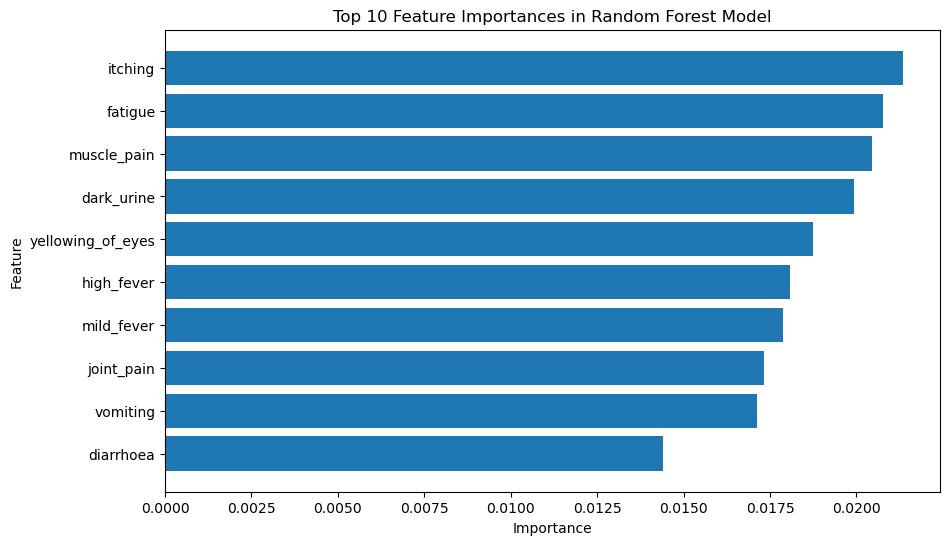

In [47]:
features_rf_df = features_rf_df.sort_values(by='Importance', ascending=False)

top_rf_features = features_rf_df.head(10)


plt.figure(figsize=(10, 6))
plt.barh(top_rf_features['Feature'], top_rf_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

In [48]:
features_rf_ranked = features_rf_df.copy()
features_rf_ranked['RF Rank'] = features_rf_ranked['Importance'].rank(ascending=False)
features_rf_ranked.drop('Importance', axis=1, inplace=True)
features_rf_ranked.head()

,Feature,RF Rank
0,itching,1.0
14,fatigue,2.0
97,muscle_pain,3.0
33,dark_urine,4.0
43,yellowing_of_eyes,5.0


In [49]:
accuracy_rf = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy_rf)

Overall Accuracy: 1.0


In [50]:
classification_rf = classification_report(y_test, y_pred)
print(classification_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         2
          24       1.00    

In [51]:
conf_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_rf)

Confusion Matrix:
[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]


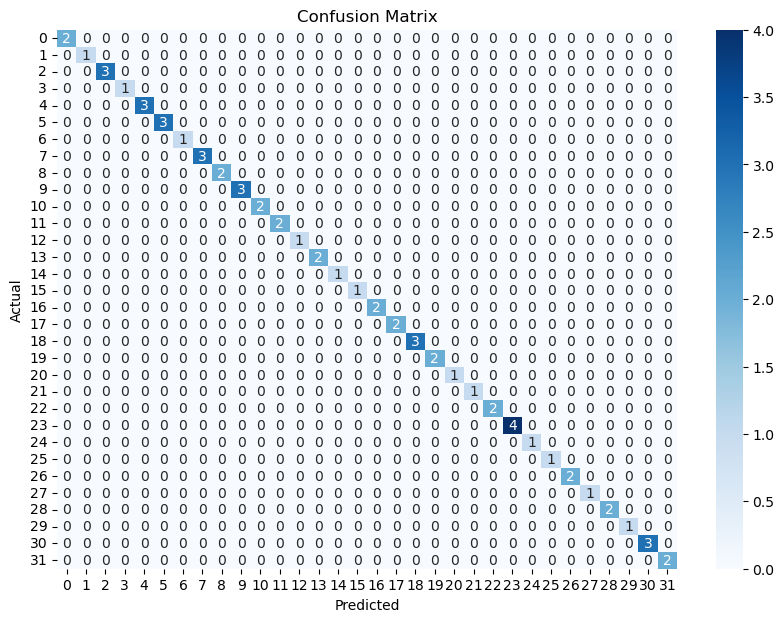

In [52]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
merged_df = pd.merge(features_df, features_rf_ranked, on="Feature", suffixes=('_RFE', '_RF'))
merged_df['Rank_Difference'] = (merged_df['Rank'] - merged_df['RF Rank']).abs()

merged_df.head()

,Feature,Rank,RF Rank,Rank_Difference
0,fatigue,1,2.0,1.0
1,vomiting,2,9.0,7.0
2,high_fever,3,6.0,3.0
3,loss_of_appetite,4,13.0,9.0
4,headache,5,19.0,14.0


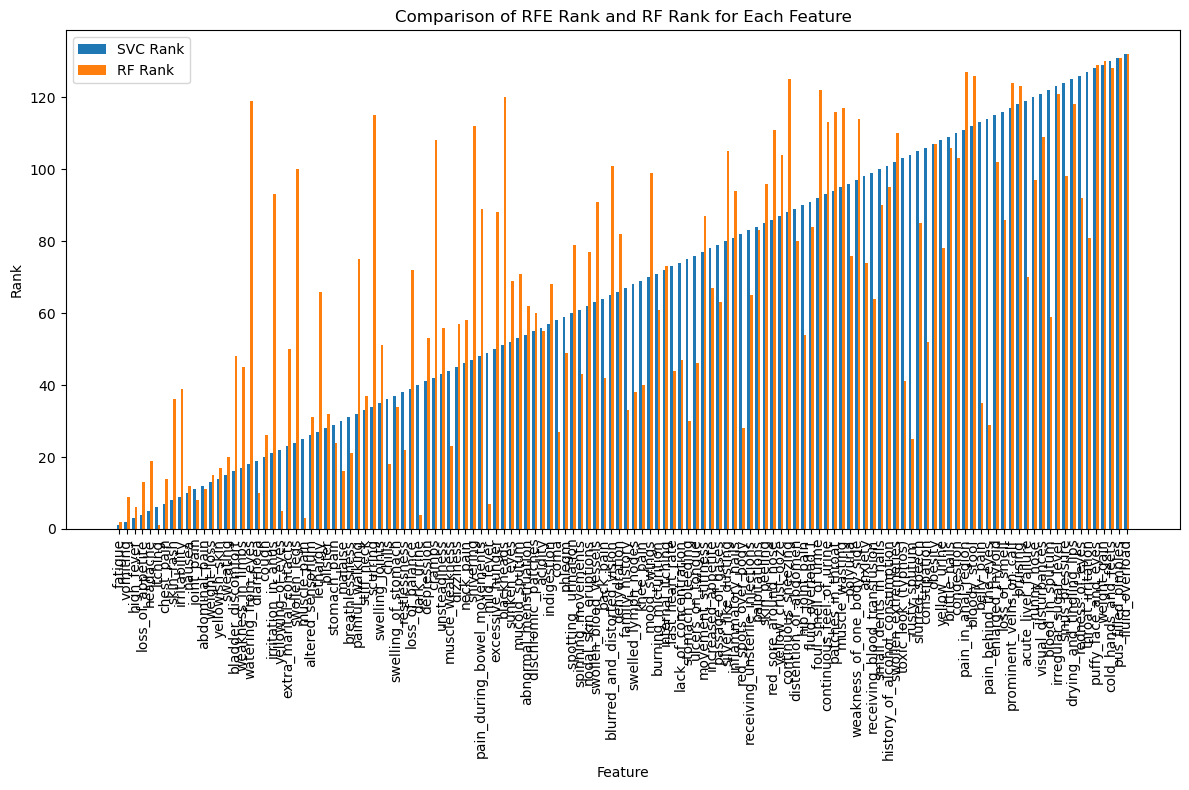

In [54]:
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(merged_df))

# Plot RFE ranks
plt.bar(index, merged_df['Rank'], bar_width, label='SVC Rank')

# Plot RF ranks
plt.bar([i + bar_width for i in index], merged_df['RF Rank'], bar_width, label='RF Rank')

plt.xlabel('Feature')
plt.ylabel('Rank')
plt.title('Comparison of RFE Rank and RF Rank for Each Feature')
plt.xticks([i + bar_width / 2 for i in index], merged_df['Feature'], rotation=90)
plt.legend()


plt.tight_layout()
plt.show()

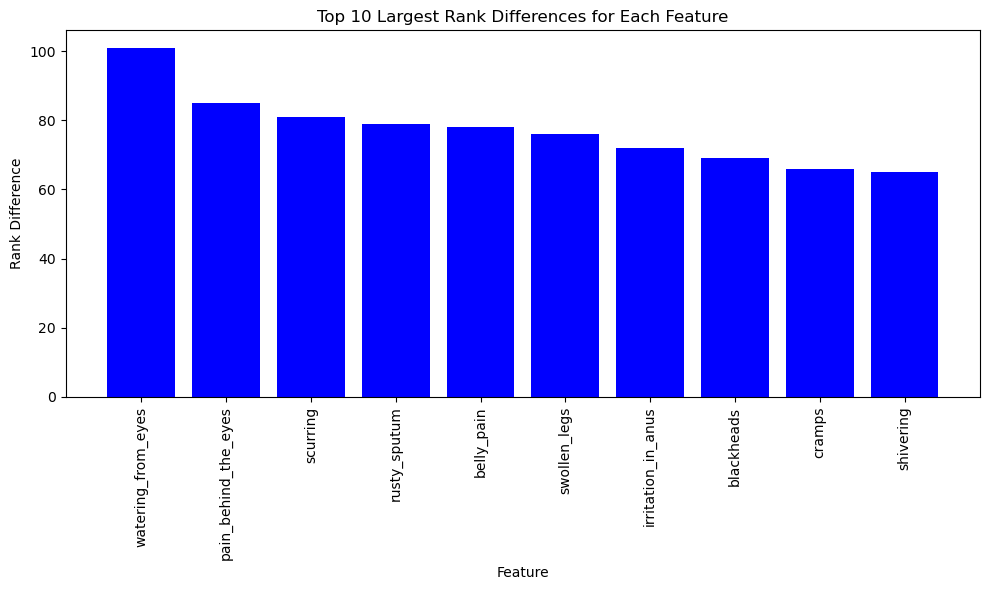

In [55]:
merged_df['Rank_Difference'] = (merged_df['Rank'] - merged_df['RF Rank']).abs()

top_10_df = merged_df.nlargest(10, 'Rank_Difference')

plt.figure(figsize=(10, 6))
plt.bar(top_10_df['Feature'], top_10_df['Rank_Difference'], color='blue')

plt.xlabel('Feature')
plt.ylabel('Rank Difference')
plt.title('Top 10 Largest Rank Differences for Each Feature')
plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()